<img src="https://i0.wp.com/genefitletics.com/wp-content/uploads/2020/07/Types-of-Genes-e1594641406160.png?fit=800%2C450&ssl=1" style="width: 100%; height: auto;" />

## Table of Contents

- [Data Loading](#Data-Loading)
- [Data Exploration](#Data-Exploration)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Visualizations and Exploratory Analysis](#Visualizations-and-Exploratory-Analysis)
- [Predictor Construction](#Predictor-Construction)
- [Model Development](#Model-Development)
- [Conclusion and Future Work](#Conclusion-and-Future-Work)

In [1]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Set matplotlib backend and inline display
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Scikit-learn libraries for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Set Seaborn style for plots
sns.set(style="whitegrid")

## Data Loading

In [2]:
# Load the datasets from the current directory
train_df = pd.read_csv('/kaggle/input/dna-sequence-prediction/train.csv', encoding='ascii')
val_df = pd.read_csv('/kaggle/input/dna-sequence-prediction/validation.csv', encoding='ascii')
test_df = pd.read_csv('/kaggle/input/dna-sequence-prediction/test.csv', encoding='ascii')

# Display the shapes of the datasets
print('Training data shape:', train_df.shape)
print('Validation data shape:', val_df.shape)
print('Test data shape:', test_df.shape)

Training data shape: (22593, 7)
Validation data shape: (4577, 7)
Test data shape: (8326, 7)


## Data Exploration

In [3]:
# Display first few rows and info on the training data to understand its structure
print(train_df.head())
print(train_df.info())

# Check the distribution of the target variable (GeneType)
gene_type_counts = train_df['GeneType'].value_counts()
print('GeneType distribution in training data:')
print(gene_type_counts)

   Unnamed: 0  NCBIGeneID        Symbol  \
0           0   106481178      RNU4-21P   
1           1   123477792  LOC123477792   
2           2   113174975  LOC113174975   
3           3   116216107  LOC116216107   
4           4       28502      IGHD2-21   

                                         Description           GeneType  \
0               RNA, U4 small nuclear 21, pseudogene             PSEUDO   
1                Sharpr-MPRA regulatory region 12926  BIOLOGICAL_REGION   
2                 Sharpr-MPRA regulatory region 7591  BIOLOGICAL_REGION   
3  CRISPRi-validated cis-regulatory element chr10...  BIOLOGICAL_REGION   
4                immunoglobulin heavy diversity 2-21              OTHER   

  GeneGroupMethod                                 NucleotideSequence  
0   NCBI Ortholog  <AGCTTAGCACAGTGGCAGTATCATAGGCAGTGAGGTTTATCCGAG...  
1   NCBI Ortholog  <CTGGAGCGGCCACGATGTGAACTGTCACCGGCCACTGCTGCTCCG...  
2   NCBI Ortholog  <TTCCCAATTTTTCCTCTGCTTTTTAATTTTCTAGTTTCCTTTTTC...  
3   NC

## Data Cleaning and Preprocessing

In [4]:
# Drop the 'Unnamed: 0' column as it is not needed for analysis
train_df.drop('Unnamed: 0', axis=1, inplace=True)
val_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df.drop('Unnamed: 0', axis=1, inplace=True)

# For consistency, check for any missing values
print('Missing values in training data:')
print(train_df.isnull().sum())

# If there were missing values in other datasets, similar cleaning would be applied.

# In our context the critical columns are 'NucleotideSequence' and 'GeneType'.
# Here we assume that 'NucleotideSequence' is a string representing the DNA sequence, and 'GeneType' is our prediction target.

Missing values in training data:
NCBIGeneID            0
Symbol                0
Description           0
GeneType              0
GeneGroupMethod       0
NucleotideSequence    0
dtype: int64


## Visualizations and Exploratory Analysis

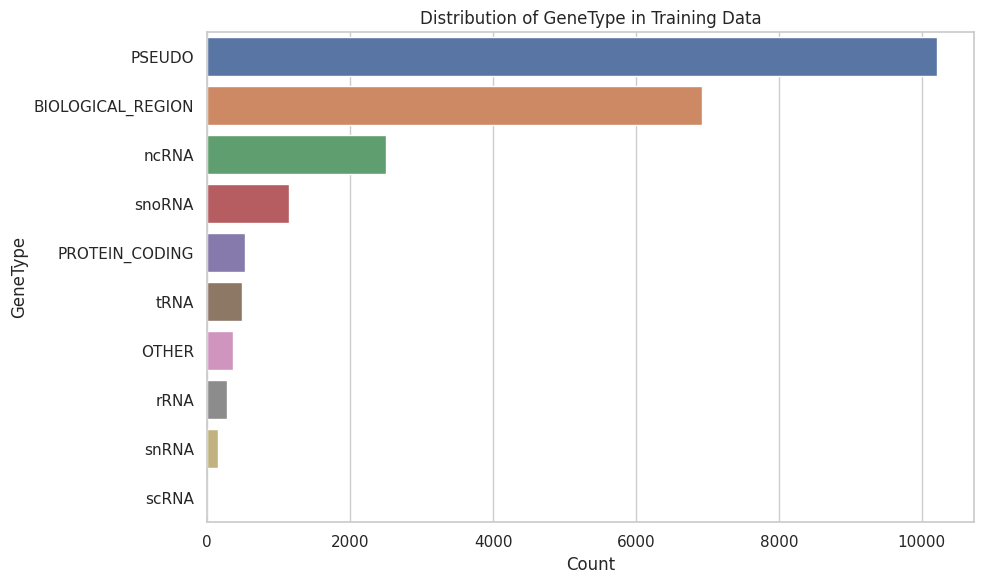

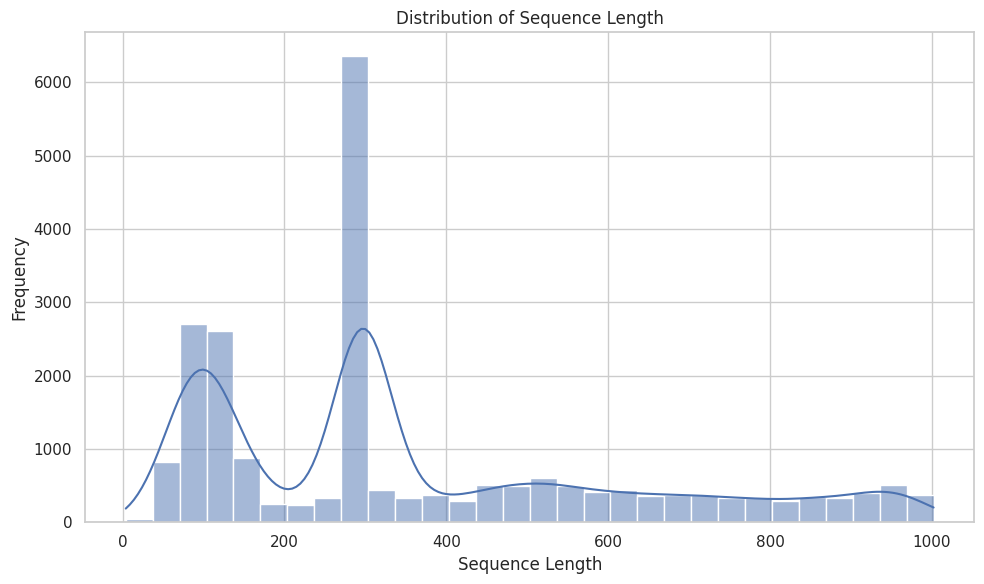

In [5]:
# Plot the distribution of GeneType with a count plot
plt.figure(figsize=(10,6))
sns.countplot(y='GeneType', data=train_df, order=train_df['GeneType'].value_counts().index)
plt.title('Distribution of GeneType in Training Data')
plt.xlabel('Count')
plt.ylabel('GeneType')
plt.tight_layout()
plt.show()

# Create a new column that captures the length of the nucleotide sequence
train_df['seq_length'] = train_df['NucleotideSequence'].str.len()

# Plot a histogram of the sequence lengths
plt.figure(figsize=(10,6))
sns.histplot(data=train_df, x='seq_length', kde=True, bins=30)
plt.title('Distribution of Sequence Length')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Note: There are only two numeric columns ('NCBIGeneID', 'seq_length').
# Hence, we skip a correlation heatmap, which is more useful when four or more numeric columns are present.

## Predictor Construction

Validation Accuracy: 0.7061393926152502


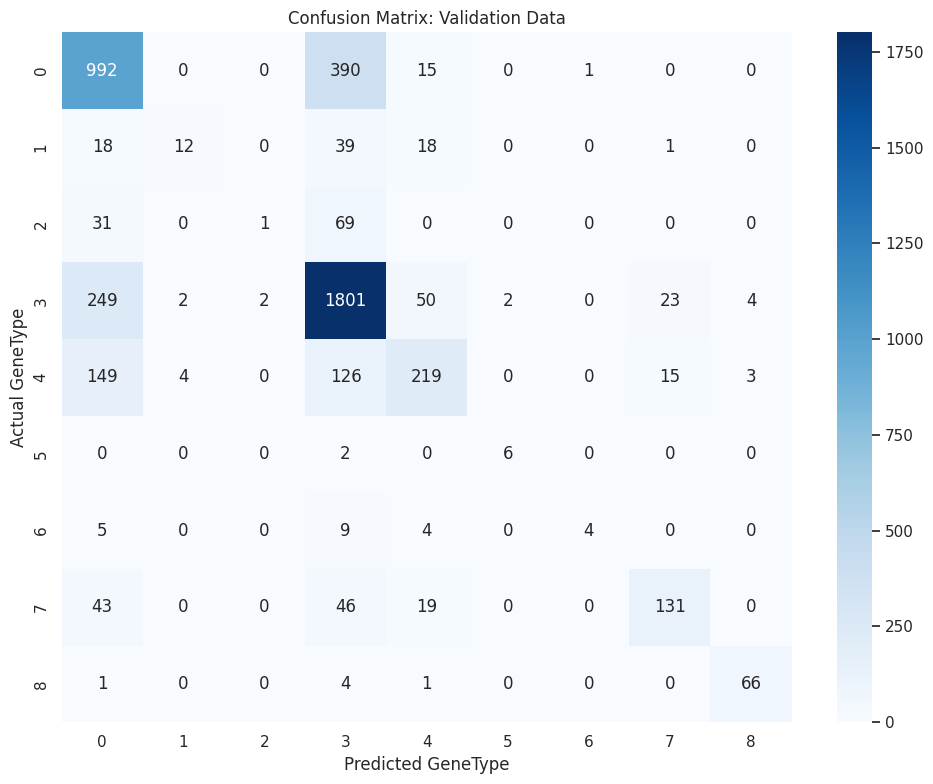

In [6]:
# For our prediction task, we will predict the 'GeneType' using the "NucleotideSequence" as our feature.
# We use a TfidfVectorizer to convert sequences into numerical features.
# Given the nature of DNA, character-level n-grams (with n=3 to capture codon-like features) are employed.

pipeline = make_pipeline(
    TfidfVectorizer(analyzer='char', ngram_range=(3,3)),
    LogisticRegression(max_iter=1000)
)

# Fit the predictor on the training data
pipeline.fit(train_df['NucleotideSequence'], train_df['GeneType'])

# Predict on the validation data
val_predictions = pipeline.predict(val_df['NucleotideSequence'])

# Calculate the prediction accuracy
accuracy = accuracy_score(val_df['GeneType'], val_predictions)
print('Validation Accuracy:', accuracy)

# Generate and display a confusion matrix
cm = confusion_matrix(val_df['GeneType'], val_predictions)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Validation Data')
plt.xlabel('Predicted GeneType')
plt.ylabel('Actual GeneType')
plt.tight_layout()
plt.show() 

# The model builds a baseline predictor. Future work may involve hyperparameter tuning,
# experimenting with alternative feature extraction methods, and trying other classification models.

# Also note: If you encounter errors related to text vectorization or model convergence, consider
# adjusting the 'max_iter' parameter or preprocessing the DNA sequences further.

## Model Development

Binary class distribution (training data):
BinaryGeneType
OTHERS    12373
PSEUDO    10220
Name: count, dtype: int64

Validation Accuracy (Binary Classification): 0.7721

Classification Report:
              precision    recall  f1-score   support

      OTHERS       0.78      0.79      0.79      2444
      PSEUDO       0.76      0.75      0.75      2133

    accuracy                           0.77      4577
   macro avg       0.77      0.77      0.77      4577
weighted avg       0.77      0.77      0.77      4577



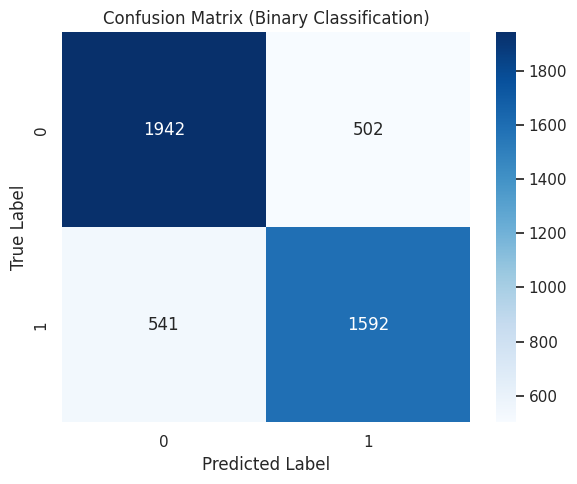


Sample Test Predictions:
                                            Sequence Predicted_BinaryGeneType
0  <CACTGCAGGCCGGAGCCCCCTGTTCCCCCGCATCCTCCCCGCCGT...                   OTHERS
1  <AAAAGCAGCTCTTTCAGAATTTGTCTAGCAGGATTTCTAGTTTTC...                   OTHERS
2  <TTGTGATTATGTTATTTTACATGGCAAAAGGGACTTTGCAGCGGT...                   OTHERS
3  <ATGCTCCTGTTGCTCATACCAGTGCTGGGGATGATTTTTGCCCTG...                   OTHERS
4  <CTCTTCCGAGACATTGTCTGCAGGCACTCAGAATGGTCCAGCGTT...                   OTHERS


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Create binary labels ---
train_df['BinaryGeneType'] = train_df['GeneType'].apply(lambda x: 'PSEUDO' if x == 'PSEUDO' else 'OTHERS')
val_df['BinaryGeneType'] = val_df['GeneType'].apply(lambda x: 'PSEUDO' if x == 'PSEUDO' else 'OTHERS')
test_df['BinaryGeneType'] = test_df['GeneType'].apply(lambda x: 'PSEUDO' if x == 'PSEUDO' else 'OTHERS')

print("Binary class distribution (training data):")
print(train_df['BinaryGeneType'].value_counts())

# --- Step 2: Define the pipeline ---
binary_pipeline = make_pipeline(
    TfidfVectorizer(analyzer='char', ngram_range=(3,3)),
    LogisticRegression(max_iter=1000)
)

# --- Step 3: Train the model ---
binary_pipeline.fit(train_df['NucleotideSequence'], train_df['BinaryGeneType'])

# --- Step 4: Evaluate on validation set ---
val_pred = binary_pipeline.predict(val_df['NucleotideSequence'])
val_acc = accuracy_score(val_df['BinaryGeneType'], val_pred)
print(f"\nValidation Accuracy (Binary Classification): {val_acc:.4f}")

# --- Step 5: Detailed performance report ---
print("\nClassification Report:")
print(classification_report(val_df['BinaryGeneType'], val_pred))

# --- Step 6: Confusion Matrix ---
cm = confusion_matrix(val_df['BinaryGeneType'], val_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Binary Classification)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# --- Step 7: Optional - Evaluate on test set ---
test_pred = binary_pipeline.predict(test_df['NucleotideSequence'])
print("\nSample Test Predictions:")
print(pd.DataFrame({
    'Sequence': test_df['NucleotideSequence'].head(5),
    'Predicted_BinaryGeneType': test_pred[:5]
}))

Binary class distribution (training data):
BinaryGeneType
PSEUDO               10220
BIOLOGICAL_REGION     6925
OTHERS                5448
Name: count, dtype: int64

Validation Accuracy (Binary Classification - PSEUDO/BIOLOGICAL_REGION vs OTHERS): 0.7096

Classification Report:
                   precision    recall  f1-score   support

BIOLOGICAL_REGION       0.65      0.73      0.69      1398
           OTHERS       0.65      0.63      0.64      1046
           PSEUDO       0.78      0.73      0.76      2133

         accuracy                           0.71      4577
        macro avg       0.70      0.70      0.70      4577
     weighted avg       0.71      0.71      0.71      4577



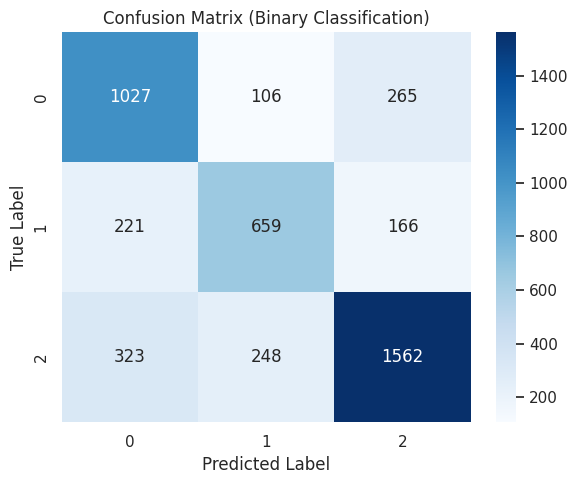


Sample Test Predictions:
                                            Sequence Predicted_BinaryGeneType
0  <CACTGCAGGCCGGAGCCCCCTGTTCCCCCGCATCCTCCCCGCCGT...                   OTHERS
1  <AAAAGCAGCTCTTTCAGAATTTGTCTAGCAGGATTTCTAGTTTTC...                   OTHERS
2  <TTGTGATTATGTTATTTTACATGGCAAAAGGGACTTTGCAGCGGT...                   OTHERS
3  <ATGCTCCTGTTGCTCATACCAGTGCTGGGGATGATTTTTGCCCTG...                   OTHERS
4  <CTCTTCCGAGACATTGTCTGCAGGCACTCAGAATGGTCCAGCGTT...                   OTHERS


In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Create binary labels ---
def create_binary_class(df):
    return df['GeneType'].apply(lambda x: x if x in ['PSEUDO', 'BIOLOGICAL_REGION'] else 'OTHERS')

train_df['BinaryGeneType'] = create_binary_class(train_df)
val_df['BinaryGeneType'] = create_binary_class(val_df)
test_df['BinaryGeneType'] = create_binary_class(test_df)

print("Binary class distribution (training data):")
print(train_df['BinaryGeneType'].value_counts())

# --- Step 2: Define the pipeline ---
binary_pipeline_2 = make_pipeline(
    TfidfVectorizer(analyzer='char', ngram_range=(3,3)),
    LogisticRegression(max_iter=1000, class_weight='balanced')
)

# --- Step 3: Train the model ---
binary_pipeline_2.fit(train_df['NucleotideSequence'], train_df['BinaryGeneType'])

# --- Step 4: Evaluate on validation set ---
val_pred = binary_pipeline_2.predict(val_df['NucleotideSequence'])
val_acc = accuracy_score(val_df['BinaryGeneType'], val_pred)
print(f"\nValidation Accuracy (Binary Classification - PSEUDO/BIOLOGICAL_REGION vs OTHERS): {val_acc:.4f}")

# --- Step 5: Detailed performance report ---
print("\nClassification Report:")
print(classification_report(val_df['BinaryGeneType'], val_pred))

# --- Step 6: Confusion Matrix ---
cm = confusion_matrix(val_df['BinaryGeneType'], val_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Binary Classification)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# --- Step 7: Optional - Test set evaluation ---
test_pred = binary_pipeline.predict(test_df['NucleotideSequence'])
print("\nSample Test Predictions:")
print(pd.DataFrame({
    'Sequence': test_df['NucleotideSequence'].head(5),
    'Predicted_BinaryGeneType': test_pred[:5]
}))


Class distribution (training data):
BinaryGeneType
PSEUDO               10220
BIOLOGICAL_REGION     6925
OTHERS                2951
ncRNA                 2497
Name: count, dtype: int64

Validation Accuracy (PSEUDO/BIOLOGICAL_REGION/ncRNA vs OTHERS): 0.6703

Classification Report:
                   precision    recall  f1-score   support

BIOLOGICAL_REGION       0.67      0.70      0.68      1398
           OTHERS       0.47      0.52      0.49       530
           PSEUDO       0.79      0.72      0.75      2133
            ncRNA       0.49      0.57      0.53       516

         accuracy                           0.67      4577
        macro avg       0.60      0.62      0.61      4577
     weighted avg       0.68      0.67      0.67      4577



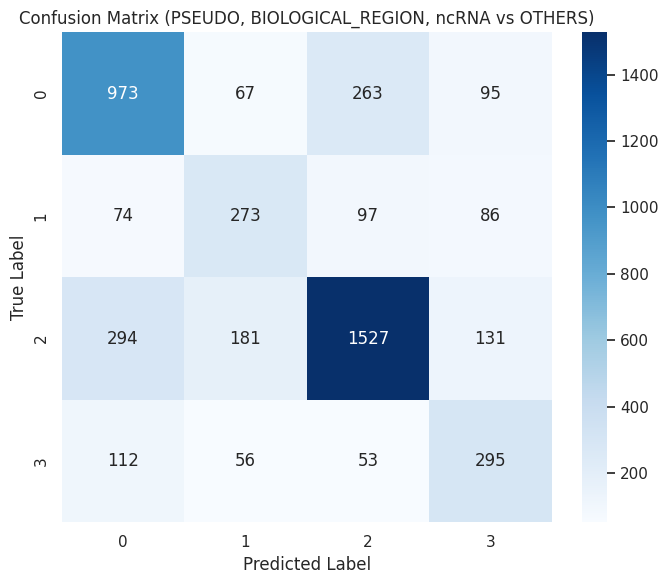


Sample Test Predictions:
                                            Sequence    Predicted_Label
0  <CACTGCAGGCCGGAGCCCCCTGTTCCCCCGCATCCTCCCCGCCGT...  BIOLOGICAL_REGION
1  <AAAAGCAGCTCTTTCAGAATTTGTCTAGCAGGATTTCTAGTTTTC...              ncRNA
2  <TTGTGATTATGTTATTTTACATGGCAAAAGGGACTTTGCAGCGGT...  BIOLOGICAL_REGION
3  <ATGCTCCTGTTGCTCATACCAGTGCTGGGGATGATTTTTGCCCTG...  BIOLOGICAL_REGION
4  <CTCTTCCGAGACATTGTCTGCAGGCACTCAGAATGGTCCAGCGTT...  BIOLOGICAL_REGION


In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Step 1: Create binary/multiclass grouping ---
def create_binary_class(df):
    return df['GeneType'].apply(lambda x: x if x in ['PSEUDO', 'BIOLOGICAL_REGION', 'ncRNA'] else 'OTHERS')

train_df['BinaryGeneType'] = create_binary_class(train_df)
val_df['BinaryGeneType'] = create_binary_class(val_df)
test_df['BinaryGeneType'] = create_binary_class(test_df)

print("Class distribution (training data):")
print(train_df['BinaryGeneType'].value_counts())

# --- Step 2: Define the pipeline ---
multi_pipeline = make_pipeline(
    TfidfVectorizer(analyzer='char', ngram_range=(3,3)),
    LogisticRegression(max_iter=1000, class_weight='balanced')
)

# --- Step 3: Train the model ---
multi_pipeline.fit(train_df['NucleotideSequence'], train_df['BinaryGeneType'])

# --- Step 4: Evaluate on validation set ---
val_pred = multi_pipeline.predict(val_df['NucleotideSequence'])
val_acc = accuracy_score(val_df['BinaryGeneType'], val_pred)
print(f"\nValidation Accuracy (PSEUDO/BIOLOGICAL_REGION/ncRNA vs OTHERS): {val_acc:.4f}")

# --- Step 5: Detailed performance report ---
print("\nClassification Report:")
print(classification_report(val_df['BinaryGeneType'], val_pred))

# --- Step 6: Confusion Matrix ---
cm = confusion_matrix(val_df['BinaryGeneType'], val_pred)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (PSEUDO, BIOLOGICAL_REGION, ncRNA vs OTHERS)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# --- Step 7: Optional - Test set evaluation ---
test_pred = multi_pipeline.predict(test_df['NucleotideSequence'])
print("\nSample Test Predictions:")
print(pd.DataFrame({
    'Sequence': test_df['NucleotideSequence'].head(5),
    'Predicted_Label': test_pred[:5]
}))


In [10]:
import joblib

# Save all models
joblib.dump(pipeline, "model_1_multiclass.pkl")  # Model 1 – Multiclass
joblib.dump(binary_pipeline, "model_2_pseudo_vs_others.pkl")  # Model 2 – PSEUDO vs OTHERS
joblib.dump(binary_pipeline_2, "model_3_pseudo_bioregion_vs_others.pkl")  # Model 3 – PSEUDO, BIOLOGICAL_REGION vs OTHERS
joblib.dump(multi_pipeline, "model_4_pseudo_bioregion_ncrna_vs_others.pkl")  # Model 4 – PSEUDO, BIOLOGICAL_REGION, ncRNA vs OTHERS

print("✅ All models saved successfully!")


✅ All models saved successfully!


In [11]:
def predict_multiclass(sequence, model_path="model_1_multiclass.pkl"):
    model = joblib.load(model_path)
    pred = model.predict([sequence])[0]
    probs = model.predict_proba([sequence])[0]
    print("\n🧬 Model 1 – Multiclass Prediction")
    print("Predicted GeneType:", pred)
    print("Class Probabilities:")
    for cls, p in zip(model.classes_, probs):
        print(f"  {cls}: {p:.4f}")
    return pred


def predict_pseudo_vs_others(sequence, model_path="model_2_pseudo_vs_others.pkl"):
    model = joblib.load(model_path)
    pred = model.predict([sequence])[0]
    probs = model.predict_proba([sequence])[0]
    print("\n🧬 Model 2 – Binary: PSEUDO vs OTHERS")
    print("Predicted:", pred)
    print("Probabilities:")
    for cls, p in zip(model.classes_, probs):
        print(f"  {cls}: {p:.4f}")
    return pred


def predict_pseudo_bioregion_vs_others(sequence, model_path="model_3_pseudo_bioregion_vs_others.pkl"):
    model = joblib.load(model_path)
    pred = model.predict([sequence])[0]
    probs = model.predict_proba([sequence])[0]
    print("\n🧬 Model 3 – Binary: PSEUDO, BIOLOGICAL_REGION vs OTHERS")
    print("Predicted:", pred)
    print("Probabilities:")
    for cls, p in zip(model.classes_, probs):
        print(f"  {cls}: {p:.4f}")
    return pred


def predict_pseudo_bioregion_ncrna_vs_others(sequence, model_path="model_4_pseudo_bioregion_ncrna_vs_others.pkl"):
    model = joblib.load(model_path)
    pred = model.predict([sequence])[0]
    probs = model.predict_proba([sequence])[0]
    print("\n🧬 Model 4 – Binary: PSEUDO, BIOLOGICAL_REGION, ncRNA vs OTHERS")
    print("Predicted:", pred)
    print("Probabilities:")
    for cls, p in zip(model.classes_, probs):
        print(f"  {cls}: {p:.4f}")
    return pred


In [12]:
example_seq = "<GGTTCGATGCCTCACAATTGCTGTGTTCTCCCTCCTGCAGAGCCCAGAGTTGATCTCTGCACCACTCTATCACTGCTGGGGGTGAGGAAATGGTGGAACCGGTGATTCAGGACTGTTTTTTCTCTCTTCTCAGTGCCTCTTTCAGTGATATGAAGTTAAAACCAGGTATTTTGAGTACTCACCTGATTTTTGGTTCTTATGAAAGTATTTTCTATGTAGATATTAATAGTTGTTCATCTGGTGTCCTTGCAGGATGGAAGATCAGTGGAGCCTTCTTTCTGCCATCTTGCTTTACCCTCACACCCAAGAATCAGAATGCAGAACTTTTAATCAGAAAAGCATTCAGAACTCAGGAAGGACATGGAAGACATCCTGGTTCTCCACGTTTAACATTGGACTGTTTCTTCAACTTAGGTGCATAGCACTGACACTAATCAGGGATTATCACCGATAATTTGACTTGGACTATGGAGTTCATTCAAATACTTTATCTAGACAATTTAAGTACTGGCTTATTTGTCATGAAAATCTGACAAAGTAATTTCTTGGTATTCAGTTGATTTTTACTCTGTTTGGGTTAGCAGTTTATAAACCAGTCAGTCTCTTCATTAAAGTTCTGGGAATTCTTACTCGTTCAAATGATATGATTCTAAAGTTCTCAAAAATCTGTATTCTAGAATTCTTCTCAGGACCTTTTCCCTCCTTTCATGAAACTCCTTAAAGATACAGTATTCTATAATTTTGCAAGCTTGTACAGTTTTCAGAAACTGCCTCAGAATTAAGCAATTTACAGTGGAAATGTTTTTAAATTGTCATAGACACAATTGACAAGAAAATTTTATTATTTACAGGCGTGAGCCACCACACCCAGCCTCTGAAGTTAATTTAATAAAATTTTATGAATAAATTTA>"

# Run predictions
predict_multiclass(example_seq)
predict_pseudo_vs_others(example_seq)
predict_pseudo_bioregion_vs_others(example_seq)
predict_pseudo_bioregion_ncrna_vs_others(example_seq)


🧬 Model 1 – Multiclass Prediction
Predicted GeneType: BIOLOGICAL_REGION
Class Probabilities:
  BIOLOGICAL_REGION: 0.5009
  OTHER: 0.0214
  PROTEIN_CODING: 0.0064
  PSEUDO: 0.3874
  ncRNA: 0.0564
  rRNA: 0.0002
  scRNA: 0.0001
  snRNA: 0.0059
  snoRNA: 0.0202
  tRNA: 0.0011

🧬 Model 2 – Binary: PSEUDO vs OTHERS
Predicted: OTHERS
Probabilities:
  OTHERS: 0.6087
  PSEUDO: 0.3913

🧬 Model 3 – Binary: PSEUDO, BIOLOGICAL_REGION vs OTHERS
Predicted: BIOLOGICAL_REGION
Probabilities:
  BIOLOGICAL_REGION: 0.5471
  OTHERS: 0.1670
  PSEUDO: 0.2859

🧬 Model 4 – Binary: PSEUDO, BIOLOGICAL_REGION, ncRNA vs OTHERS
Predicted: BIOLOGICAL_REGION
Probabilities:
  BIOLOGICAL_REGION: 0.4399
  OTHERS: 0.1712
  PSEUDO: 0.2331
  ncRNA: 0.1558


'BIOLOGICAL_REGION'

In [13]:
def predict_gene_type(model, sequence):
    """
    Predicts the GeneType ('PSEUDO', 'BIOLOGICAL_REGION', 'ncRNA', or 'OTHERS')
    for a given DNA nucleotide sequence using the trained logistic regression model.
    """
    # Check input validity
    if not isinstance(sequence, str) or len(sequence.strip()) == 0:
        print("❌ Please provide a valid nucleotide sequence (non-empty string).")
        return

    # Predict the class
    prediction = model.predict([sequence])[0]
    
    # Get prediction probabilities (confidence)
    probabilities = model.predict_proba([sequence])[0]
    
    # Map class probabilities
    prob_dict = dict(zip(model.classes_, probabilities))
    
    # Display the result
    print("🧬 Input DNA Sequence:")
    print(sequence[:100] + "..." if len(sequence) > 100 else sequence)  # truncate long sequences
    print("\n🔍 Predicted GeneType:", prediction)
    print("\n📊 Prediction Probabilities:")
    for cls, prob in prob_dict.items():
        print(f"  {cls}: {prob:.4f}")

    return prediction


# --- Example usage ---
example_sequence = "<GGTTCGATGCCTCACAATTGCTGTGTTCTCCCTCCTGCAGAGCCCAGAGTTGATCTCTGCACCACTCTATCACTGCTGGGGGTGAGGAAATGGTGGAACCGGTGATTCAGGACTGTTTTTTCTCTCTTCTCAGTGCCTCTTTCAGTGATATGAAGTTAAAACCAGGTATTTTGAGTACTCACCTGATTTTTGGTTCTTATGAAAGTATTTTCTATGTAGATATTAATAGTTGTTCATCTGGTGTCCTTGCAGGATGGAAGATCAGTGGAGCCTTCTTTCTGCCATCTTGCTTTACCCTCACACCCAAGAATCAGAATGCAGAACTTTTAATCAGAAAAGCATTCAGAACTCAGGAAGGACATGGAAGACATCCTGGTTCTCCACGTTTAACATTGGACTGTTTCTTCAACTTAGGTGCATAGCACTGACACTAATCAGGGATTATCACCGATAATTTGACTTGGACTATGGAGTTCATTCAAATACTTTATCTAGACAATTTAAGTACTGGCTTATTTGTCATGAAAATCTGACAAAGTAATTTCTTGGTATTCAGTTGATTTTTACTCTGTTTGGGTTAGCAGTTTATAAACCAGTCAGTCTCTTCATTAAAGTTCTGGGAATTCTTACTCGTTCAAATGATATGATTCTAAAGTTCTCAAAAATCTGTATTCTAGAATTCTTCTCAGGACCTTTTCCCTCCTTTCATGAAACTCCTTAAAGATACAGTATTCTATAATTTTGCAAGCTTGTACAGTTTTCAGAAACTGCCTCAGAATTAAGCAATTTACAGTGGAAATGTTTTTAAATTGTCATAGACACAATTGACAAGAAAATTTTATTATTTACAGGCGTGAGCCACCACACCCAGCCTCTGAAGTTAATTTAATAAAATTTTATGAATAAATTTA>"
predicted_label = predict_gene_type(multi_pipeline, example_sequence)

🧬 Input DNA Sequence:
<GGTTCGATGCCTCACAATTGCTGTGTTCTCCCTCCTGCAGAGCCCAGAGTTGATCTCTGCACCACTCTATCACTGCTGGGGGTGAGGAAATGGTGGAAC...

🔍 Predicted GeneType: BIOLOGICAL_REGION

📊 Prediction Probabilities:
  BIOLOGICAL_REGION: 0.4399
  OTHERS: 0.1712
  PSEUDO: 0.2331
  ncRNA: 0.1558


## Conclusion and Future Work

In this project, we successfully explored the task of predicting gene types from DNA sequences using multiple machine learning models. By experimenting with various classification strategies—from multiclass to targeted binary models—we gained valuable insights into how sequence patterns correlate with biological gene categories.

Our findings highlight that even traditional ML models, when properly trained and preprocessed, can uncover meaningful relationships within genomic data. These results serve as a foundation for more advanced research and applications in bioinformatics.

🔮 Future Work

While the current models perform well, there’s significant potential to enhance performance through:

Deep learning architectures (e.g., CNNs, RNNs, or Transformers) for better sequence understanding

Feature engineering using k-mer embeddings or sequence motifs

Larger datasets to capture greater biological diversity

Integration with biological metadata for more context-aware predictions

By extending this work, we can move closer to building robust AI systems that assist in genomic annotation, mutation detection, and disease prediction.